In [2]:
# load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
# import data
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# Data Source
https://www.kaggle.com/airbnb/boston

# Busiest Time In A Year?

In [226]:
# what does data look like
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [227]:
calendar.listing_id.nunique()

3585

In [228]:
# clean price column:
## replace money sign and comma
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].astype(float)

In [229]:
# clean duplicate data: id_12898806 has replicated data
calendar = calendar.drop_duplicates()

In [230]:
# change available from t/f to 1/0 so that I can aggregate count easily
calendar = calendar.replace({'available': {'t': 1, 'f': 0}})# 

In [231]:
# derive month of the date
def month(row):
    return row['date'][5:7]

calendar['month'] = calendar.apply(lambda row: month(row), axis = 1)

In [232]:
# aggregation info I need: average price and availability of each month
## mean and median have similar pattern so just use mean
agg_price = calendar.groupby('month').agg({'price': ['mean'], 'available': ['sum']})

In [238]:
agg_price

,price,available
,mean,sum
month,,
01,182.799671,63181
02,180.961028,56810
03,181.818742,55181
04,197.252890,51382
05,193.712295,53600
06,196.535302,52731
07,202.486309,54963
08,203.330142,55561


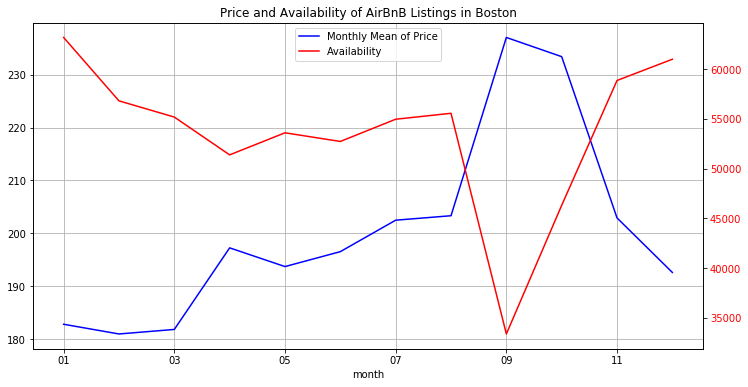

In [237]:
plt.figure(figsize=(12, 6))
plt.xlabel('Month')
plt.title('Price and Availability of AirBnB Listings in Boston')

ax1 = agg_price.iloc[:, 0].plot(color = 'blue', grid = True, label = 'Monthly Mean of Price')
ax2 = agg_price.iloc[:, 1].plot(color = 'red', grid = True, secondary_y = True, label = 'Availability')
# ax3 = agg_price.iloc[:, 1].plot(color = 'navy', grid = True, label = 'Median of Price')

for tl in ax2.get_yticklabels():
    tl.set_color('r')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc = 'upper center')
plt.show()

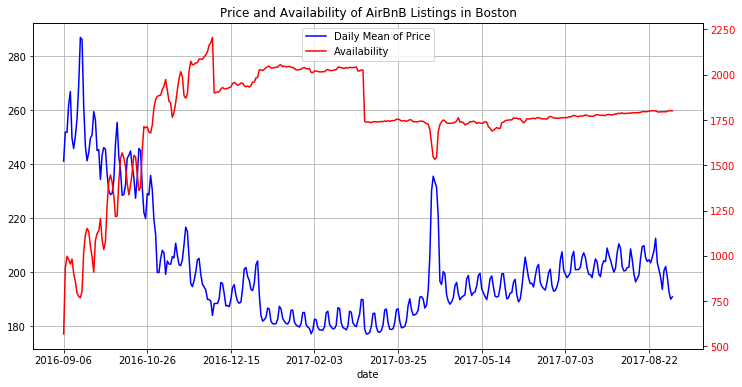

In [241]:
# aggregate by date
agg_price_daily = calendar.groupby('date').agg({'price': ['mean'], 'available': ['sum']})

plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.title('Price and Availability of AirBnB Listings in Boston')

ax1 = agg_price_daily.iloc[:, 0].plot(color = 'blue', grid = True, label = 'Daily Mean of Price')
ax2 = agg_price_daily.iloc[:, 1].plot(color = 'red', grid = True, secondary_y = True, label = 'Availability')
# ax3 = agg_price.iloc[:, 1].plot(color = 'navy', grid = True, label = 'Median of Price')

for tl in ax2.get_yticklabels():
    tl.set_color('r')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc = 'upper center')
plt.show()

# Summary
This calendar data has availability info of 3585 listings from 2016-09-06 to 2017-09-05. Since we do not have data that show whether each listing is rented or not, a listing is unavailable for two potential reasons:
    1. The owner does not want to do this business on this day.
    2. The listing is rented.

Hence, we can only estimate the time when AirBnB in Boston is busy, by price and availability. When price increases and availability decreases, this signal indicates a busy time.

Here are the findings:
    1. Starting from September 2016, price decreases and availability increases, until early December 2016. 
    2. In early April, price has a sharp increase and availability has a sudden drop, which indicates a busy time.
    3. This study can only represent the trend between Sep 2016 and Sep 2017 instead of overall seasonality. Further investigation is recommended to find out what cause the huge difference in availability between 2016-09-06 and 2017-09-05. 
   
Two potential reasons for the sudden drop in September:
    1. More people are doing AirBnB business in 2017 than in 2016 hence customers have more new options and fewer people may choose the original listings.
    2. Not all of these original 3585 listings start to do their AirBnB business from 2016-09-06, maybe some start to do business in Winter 2016.

# User Experience
What do people like or dislike about their AirBnB journey in Boston?

In [135]:
# what does data look like
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [4]:
# read nlp library
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [137]:
reviews.comments[0]

"My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)"

In [138]:
# try nltk analyzer
# nltk analyzer classifies this text as negative...
blob = TextBlob(reviews.comments[0], analyzer = NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='neg', p_pos=0.09723026115085937, p_neg=0.9027697388491426)

In [139]:
# decide to use default analyzer
blob = TextBlob(reviews.comments[0])
blob.sentiment

Sentiment(polarity=0.3880208333333333, subjectivity=0.7520833333333333)

In [134]:
# need to translate language, or non-english comment are always neutral/negative
## unable to translate all comments due to request limit
"""
text = '这里很不好'
blob = TextBlob(text)
blob.translate(to = 'en').polarity
"""

"\ntext = '这里很不好'\nblob = TextBlob(text)\nblob.translate(to = 'en').polarity\n"

In [5]:
# need to clean missing value
reviews = reviews.dropna(subset = ['comments'])
reviews = reviews.reset_index(drop = True)

In [6]:
# rate and classify polarity of each comment
polarity = []
polarity_class = []

for i in range(reviews.shape[0]):
    # print('we are dealing with the ' + str(i) + 'th comment: ' + reviews.comments[i])
    
    blob = TextBlob(reviews.comments[i])
    
    # translate to english
    ## unable to do it due to request limit
    # if blob.detect_language() != 'en':
    # blob = blob.translate(to = 'en')
    # time.sleep(0.1)
    
    polarity.append(blob.polarity)
        
    if blob.polarity > 0:
        polarity_class.append('positive')
        
    elif blob.polarity == 0:
        polarity_class.append('neutral')
            
    else:
        polarity_class.append('negative')
        
reviews['polarity'] = polarity
reviews['polarity_class'] = polarity_class

In [142]:
reviews.polarity.describe()

count    68222.000000
mean         0.369697
std          0.199060
min         -1.000000
25%          0.256944
50%          0.368750
75%          0.483333
max          1.000000
Name: polarity, dtype: float64

In [143]:
reviews.polarity_class.value_counts()

positive    63693
neutral      3658
negative      871
Name: polarity_class, dtype: int64

Text(0.5, 1, 'Comment Polarity of 68k AirBnB Reviews from Mar 2009 to Sep 2016')

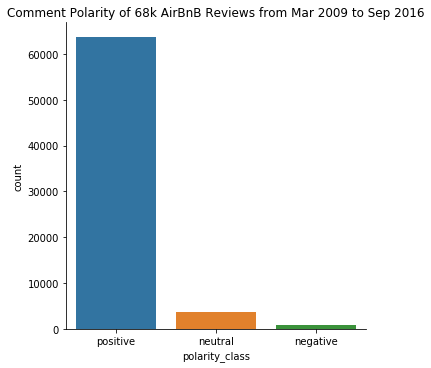

In [144]:
sns.catplot(x = 'polarity_class' , kind = 'count' , data = reviews)
plt.title('Comment Polarity of 68k AirBnB Reviews from Mar 2009 to Sep 2016')

In [145]:
# positive tweets
reviews[reviews.polarity_class == 'positive']['comments'].head()

0    My stay at islam's place was really cool! Good...
1    Great location for both airport and city - gre...
2    We really enjoyed our stay at Islams house. Fr...
3    The room was nice and clean and so were the co...
4    Great location. Just 5 mins walk from the Airp...
Name: comments, dtype: object

In [146]:
reviews.comments[1]

'Great location for both airport and city - great amenities in the house: Plus Islam was always very helpful even though he was away'

In [147]:
# neutral tweets
reviews[reviews.polarity_class == 'neutral']['comments'].head()

12    Mi estadía en Boston aunque corta fue muy buen...
50    La maison située dans East Boston était sympat...
55    De kamer wordt verhuurd via een "self-check in...
65                              had everything needed! 
83    Una casa muy acogedora, muy cerca (a menos de ...
Name: comments, dtype: object

In [148]:
reviews.comments[65]

'had everything needed! '

In [149]:
# negative tweets
reviews[reviews.polarity_class == 'negative']['comments'].head()

20    Izzy was a nice and helpful host with detailed...
24    We didn´t meet Izzy at all!!!! After we arrive...
46    Izzy's home is conveniently located for anyone...
59    Hard tofind parking.  One night's sleep is alr...
64    Parking situation was bad.  Very hard to find ...
Name: comments, dtype: object

In [150]:
# fn
reviews.comments[20]

'Izzy was a nice and helpful host with detailed directions. The room is in the basement and even though Izzy mentions it we somehow missed that detail and it has narrow stairs leading down to it which made it hard for us to carry our bags up and down. We are unfortunately traveling with really heavy bags. The place is in East Boston and is extremely convenient for the airport.'

In [151]:
reviews.comments[24]

'We didn´t meet Izzy at all!!!! After we arrived nobody was there except some spanish speaking people.\r\nOur room was disgusting!!! It smelted like mold and was very dirty!!!!\r\nThe Bathroom wasn´t cleaned either and my friend and i wanted to leave right after we came…\r\nThe Dryer or washer was not usable because the assistant from Izzy washed all the time.\r\nThe Neighborhood is not safe at all and every other morning u could hear people fight.\r\nDon´t stay there!!!!!! It´s nothing like u would expect it! \r\nAnd it´s defenetly to expensive for this nasty place!!!! '

In [36]:
# ngram function
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 

stopwords = set(stopwords.words( 'english' ))
more_stopwords = set(['would', 'definitely', 'place', 'stay', 'us', 'recommend'])
stopwords = stopwords.union(more_stopwords)

def generate_ngrams(df, col, n_gram, max_row):
    temp_dict = defaultdict(int)
    for text in df[col]:
        for word in ngram_extractor(text, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

def ngram_extractor(text, n_gram):
    tokens = wc_tokenize(text)
    tokens = remove_stopword(tokens)
    tokens = lemmatized_tokens(tokens)
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def wc_tokenize(text):
    tokens = []
    
    # tokenize
    ## transfer text in string to lowercase
    text = text.lower()
    
    ## replace non alpha/digit character with whitespace
    for character in text:
        if not(character.isalpha() or character.isdigit()):
            text = text.replace(character, ' ')
    
    ## split with space
    text = text.split(' ')
    for token in text:
        if token != '':
            tokens.append(token)
            
    return tokens
            
def remove_stopword(tokens):
    tokens_nostopword = []
    
    for token in tokens:
        if not token in stopwords:
            tokens_nostopword.append(token)
            
    return tokens_nostopword

def stem_tokens(tokens):
    stemmed_tokens = []
    ps = PorterStemmer()
    
    for token in tokens:
        stemmed_tokens.append(ps.stem(token))
    
    return stemmed_tokens

def lemmatized_tokens(tokens):
    lemmatized_tokens = []
    lemmatizer = WordNetLemmatizer()
    
    for token in tokens:
        lemmatized_tokens.append(lemmatizer.lemmatize(token, pos = 'v'))
    
    return lemmatized_tokens

In [42]:
# visualize ngrams word count output
import seaborn as sns

def top_words(df):
    plt.figure(figsize=(12,8))
    sns.barplot(df["wordcount"], df["word"])
    plt.xlabel("Word Count", fontsize = 15)
    plt.ylabel("Terms", fontsize = 15)
    plt.title("Top Words In Reviews")
    plt.show()

In [9]:
# function to detect non-english comment
from nltk.corpus import words

def non_english(text):
    tokens = wc_tokenize(text)
    tokens = lemmatized_tokens(tokens)
    # print(tokens)
    
    if len(tokens) < 3:
        return False
    elif tokens[0] in words.words() and tokens[1] in words.words() and tokens[2] in words.words():
        return False
    
    return True

In [15]:
non_english("While others have had great experiences")

True

In [18]:
"others" in words.words()

False

In [213]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('financing', pos = 'v')

'finance'

In [11]:
# exclude non-english negative comments for better word counts
## loop each comment, tokenize, test if first 3 words are all in is english
reviews_negative = reviews[reviews.polarity_class == 'negative']
reviews_negative = reviews_negative.reset_index(drop = True)
reviews_negative.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity,polarity_class
0,1178162,11901870,2014-04-18,578962,Samir,Izzy was a nice and helpful host with detailed...,-0.069753,negative
1,1178162,12753057,2014-05-10,14113353,Chris,We didn´t meet Izzy at all!!!! After we arrive...,-0.507542,negative
2,1178162,18696958,2014-08-30,15346724,Stephen,Izzy's home is conveniently located for anyone...,-0.018182,negative
3,1178162,21303347,2014-10-14,21630508,Linda,Hard tofind parking. One night's sleep is alr...,-0.097222,negative
4,1178162,21809402,2014-10-24,22554506,Claude,Parking situation was bad. Very hard to find ...,-0.225045,negative


In [12]:
# main loop to detect non-english comment
for i in range(reviews_negative.shape[0]):
    if non_english(reviews_negative.comments[i]):
        reviews_negative.loc[i, 'polarity'] = np.nan
        reviews_negative.loc[i, 'polarity_class'] = 'non english'

In [14]:
reviews_negative.iloc[0:100, ]

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity,polarity_class
0,1178162,11901870,2014-04-18,578962,Samir,Izzy was a nice and helpful host with detailed...,NaN,non english
1,1178162,12753057,2014-05-10,14113353,Chris,We didn´t meet Izzy at all!!!! After we arrive...,NaN,non english
2,1178162,18696958,2014-08-30,15346724,Stephen,Izzy's home is conveniently located for anyone...,NaN,non english
3,1178162,21303347,2014-10-14,21630508,Linda,Hard tofind parking. One night's sleep is alr...,NaN,non english
4,1178162,21809402,2014-10-24,22554506,Claude,Parking situation was bad. Very hard to find ...,-0.225045,negative
5,1178162,94675484,2016-08-16,17356185,Giulia,nothing what I expected !\nwe start from the p...,-0.456888,negative
6,9857,14951136,2014-06-30,11434319,David,"Apartment is small, but was well located and f...",-0.060000,negative
7,3992208,19488134,2014-09-13,19641034,Max,The apartment is really close to the places to...,-0.021875,negative
8,3992208,20706874,2014-10-04,10291988,Géraldine,"Sean's appartement was as described, very well...",NaN,non english
9,3992208,36082180,2015-06-25,26120265,Ann,We were rather disappointed with this accommod...,-0.103030,negative


In [19]:
# drop non english negative
reviews_negative = reviews_negative.dropna(subset = ['polarity'])
reviews_negative = reviews_negative.reset_index(drop = True)

In [28]:
# ngrams word count of positive and negative
reviews_positive = reviews[reviews.polarity_class == 'positive']
ngrams_positive1 = generate_ngrams(reviews_positive, 'comments', 1, 20)
ngrams_positive2 = generate_ngrams(reviews_positive, 'comments', 2, 20)
ngrams_positive3 = generate_ngrams(reviews_positive, 'comments', 3, 20)

ngrams_negative1 = generate_ngrams(reviews_negative, 'comments', 1, 20)
ngrams_negative2 = generate_ngrams(reviews_negative, 'comments', 2, 20)
ngrams_negative3 = generate_ngrams(reviews_negative, 'comments', 3, 20)

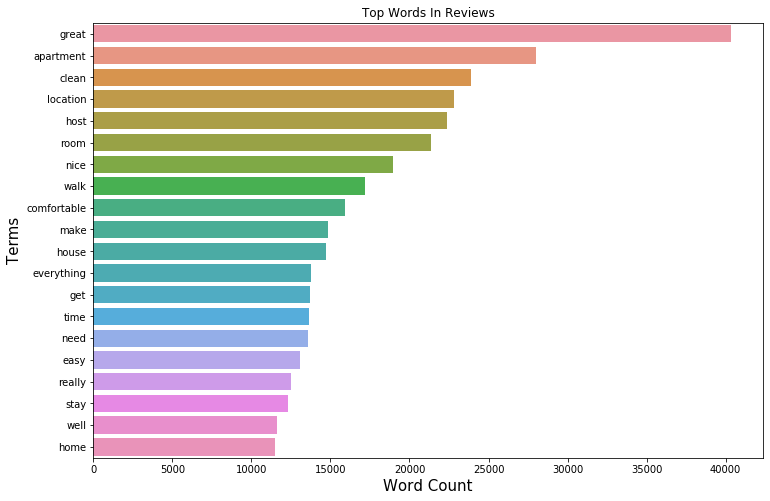

In [43]:
top_words(ngrams_positive1)

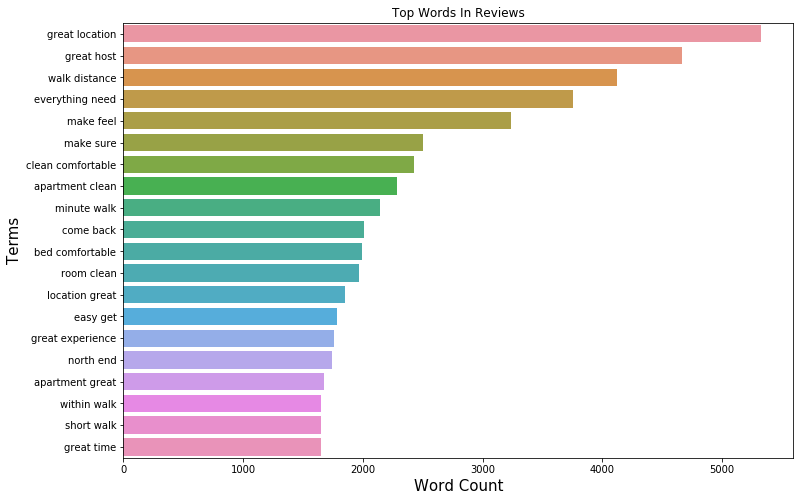

In [44]:
top_words(ngrams_positive2)

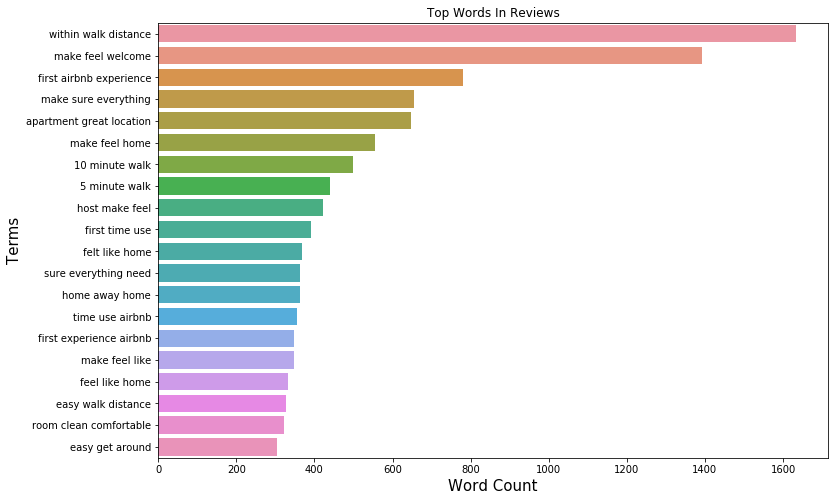

In [45]:
top_words(ngrams_positive3)

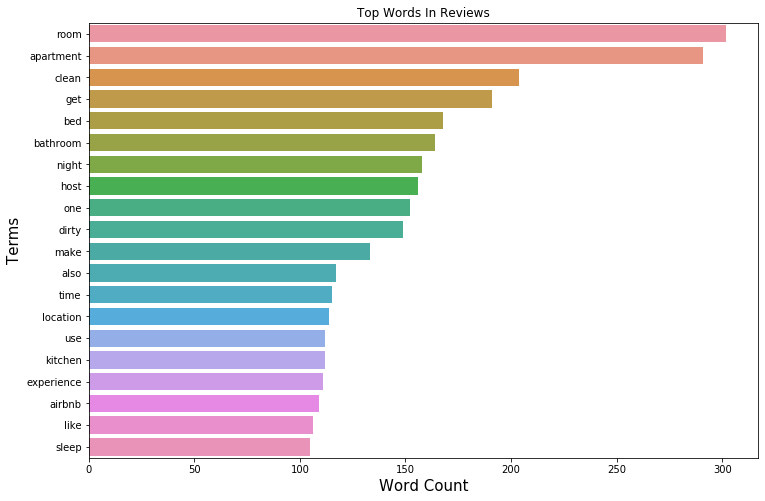

In [46]:
top_words(ngrams_negative1)

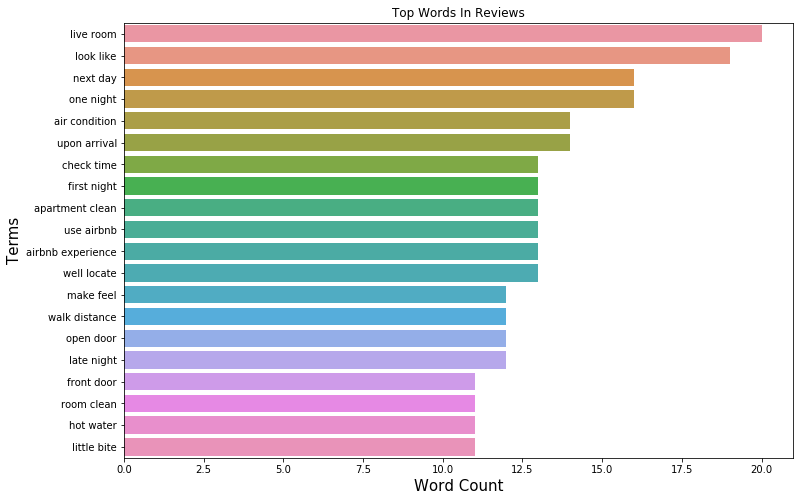

In [49]:
top_words(ngrams_negative2)

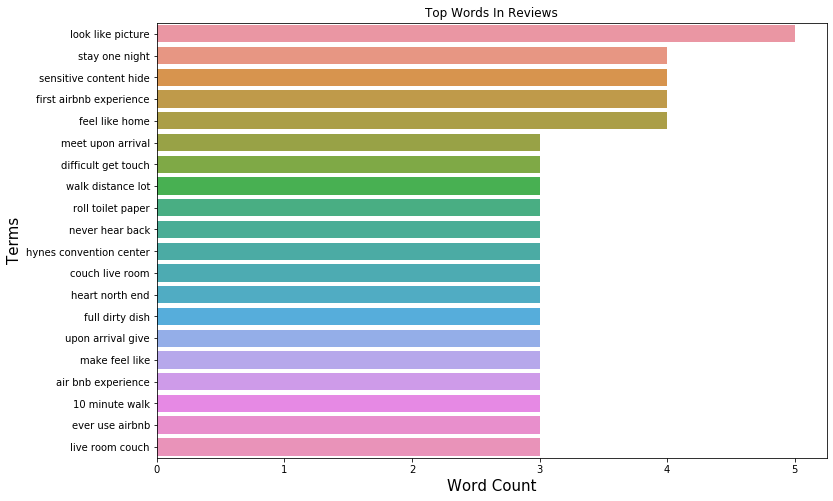

In [57]:
top_words(ngrams_negative3)

# Summary
The review data includes 68k comments from to 2009-03-21 to 2016-09-06.

### Mostly Mentioned In Positive Reviews
1. a convenient location with a high walking score
2. a clean apartment
3. a great host that make visitors feel welcomed

### Mostly Mentioned In Negative Reviews
1. dirty kitchen...
2. bad communication

### Further Improvement
1. translate non-English comment and dig into more info
2. improve non-English filter

# What are vibe of each neighborhood in Boston

In [5]:
listings.loc[0:100, ['host_neighbourhood', 'neighbourhood']]

,host_neighbourhood,neighbourhood
0,Roslindale,Roslindale
1,Roslindale,Roslindale
2,Roslindale,Roslindale
3,NaN,NaN
4,Roslindale,Roslindale
5,Roslindale,Roslindale
6,Roslindale,NaN
7,Roslindale,Roslindale
8,Roslindale,Roslindale
9,Roslindale,Roslindale


In [6]:
# host neighborhood means the location of the host? and neighborhood is the real listing location?
listings.neighbourhood.value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Downtown                8
Brookline               8
Leather District        8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

In [34]:
# lets select the top 3 most popular neighborhood and count words in their description
## column: neighborhood_overview
## 1st: Allston-Brighton
## 2nd: Jamaica Plain
## 3rd: South End
AB = listings[listings.neighbourhood == 'Allston-Brighton']
JP = listings[listings.neighbourhood == 'Jamaica Plain']
SE = listings[listings.neighbourhood == 'South End']

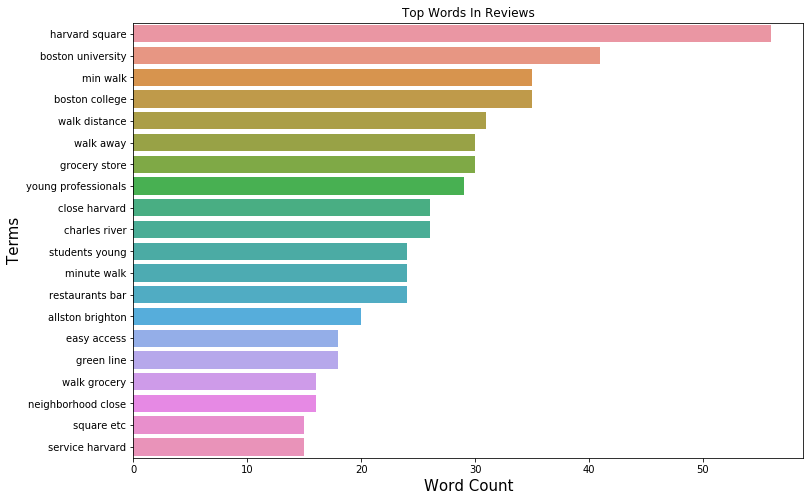

In [51]:
AB_nonan = AB.dropna(subset = ['neighborhood_overview'])
AB_2grams = generate_ngrams(AB_nonan, 'neighborhood_overview', 2, 20)
top_words(AB_2grams)

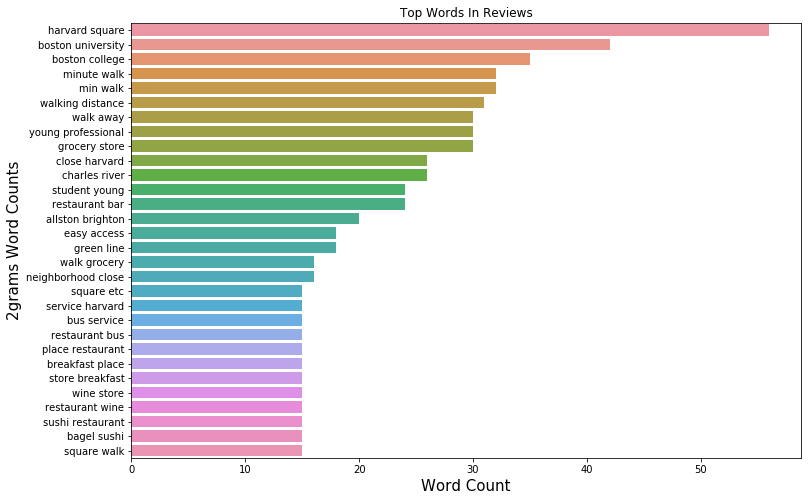

In [113]:
top_words(AB_2grams)

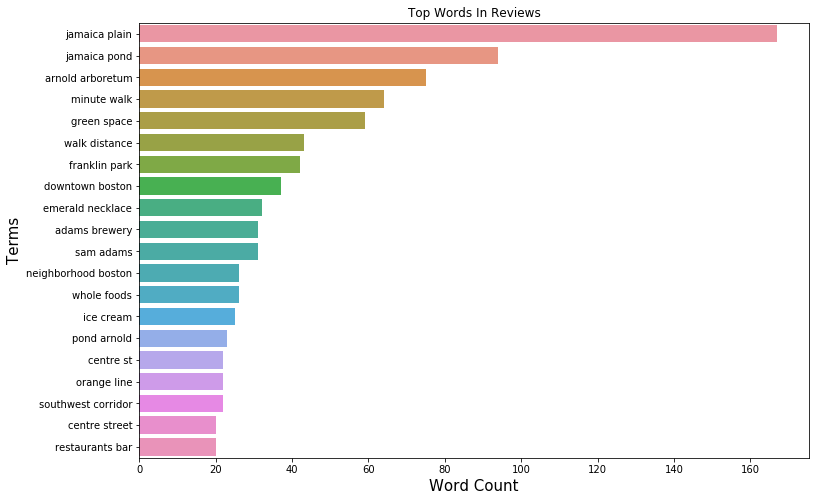

In [52]:
JP_nonan = JP.dropna(subset = ['neighborhood_overview'])
JP_2grams = generate_ngrams(JP_nonan, 'neighborhood_overview', 2, 20)
top_words(JP_2grams)

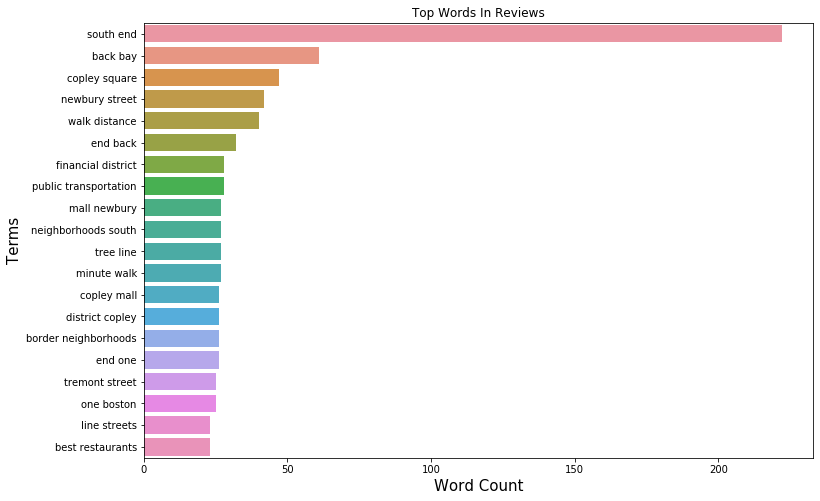

In [53]:
SE_nonan = SE.dropna(subset = ['neighborhood_overview'])
SE_2grams = generate_ngrams(SE_nonan, 'neighborhood_overview', 2, 20)
top_words(SE_2grams)

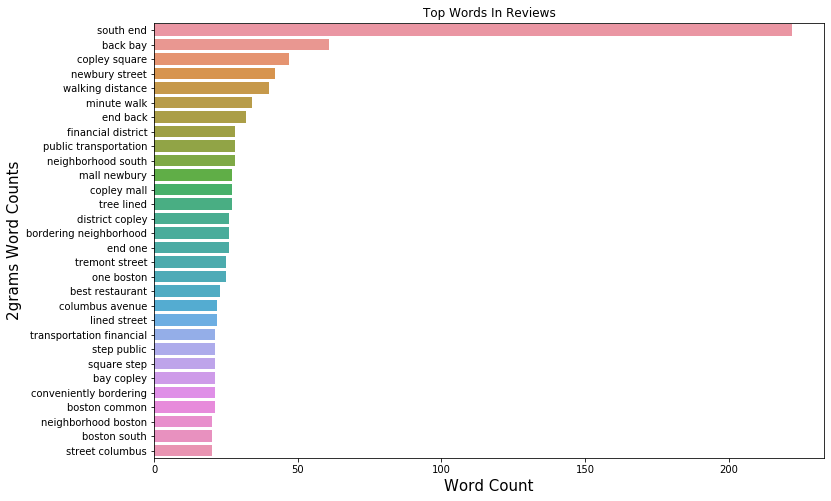

In [211]:
top_words(SE_2grams)